In [ ]:
# Loading the IMDB dataset #להעלות את 10000 המילים הפופולריות ביותר
#******************************
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #מחל

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [ ]:
# Decoding reviews back to text # סיווג המילים חיובי/שלילי
#******************************
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:

#Preparing the data #הכנת הדטה
#Encoding the integer sequences via multi-hot encoding # הפיכת כל משפט לוקטור 0/1
#*****************************************************
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:

# Building your model
# Model definition
#******************************
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
model = keras.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0010), activation="relu")) #שכבה 1
#model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dropout(0.2))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0010), activation="relu")) #שכבה 2
#model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation="sigmoid"))


In [ ]:

# Compiling the model
#******************************
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [ ]:

# Validating your approach #את האימון אני מחלקת לאימון וולידציה
# Setting aside a validation set
#*******************************
x_val = x_train[:10000] # to be used for validation
partial_x_train = x_train[10000:]
y_val = y_train[:10000] # to be used for validation
partial_y_train = y_train[10000:]


# Training your model #מאמנת את המודל
#*******************************
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


Epoch 1/30
30/30 [==============================] - 6s 176ms/step - loss: 0.6265 - accuracy: 0.7060 - val_loss: 0.5774 - val_accuracy: 0.8022
Epoch 2/30
30/30 [==============================] - 3s 101ms/step - loss: 0.5397 - accuracy: 0.8114 - val_loss: 0.5169 - val_accuracy: 0.8359
Epoch 3/30
30/30 [==============================] - 3s 94ms/step - loss: 0.4837 - accuracy: 0.8425 - val_loss: 0.4732 - val_accuracy: 0.8486
Epoch 4/30
30/30 [==============================] - 3s 96ms/step - loss: 0.4463 - accuracy: 0.8536 - val_loss: 0.4410 - val_accuracy: 0.8606
Epoch 5/30
30/30 [==============================] - 3s 116ms/step - loss: 0.4139 - accuracy: 0.8625 - val_loss: 0.4152 - val_accuracy: 0.8667
Epoch 6/30
30/30 [==============================] - 3s 107ms/step - loss: 0.3891 - accuracy: 0.8713 - val_loss: 0.3947 - val_accuracy: 0.8704
Epoch 7/30
30/30 [==============================] - 3s 98ms/step - loss: 0.3706 - accuracy: 0.8731 - val_loss: 0.3782 - val_accuracy: 0.8752
Epoch 8/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

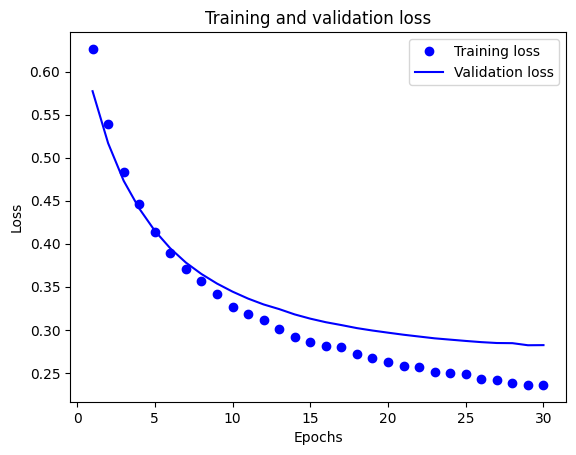

In [ ]:
# Plotting the training and validation loss #רוצה לראות בגרף איך מתנהג האימון ואיך מתנגת פונקציית ההפסד של הולידציה
#******************************************
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


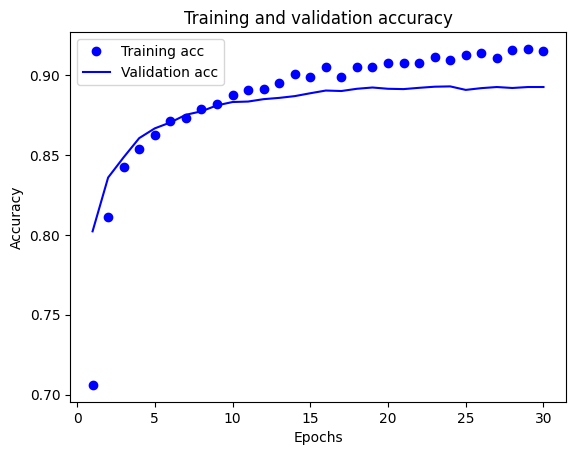

In [ ]:
# Plotting the training and validation accuracy # רוצה לראות בגרף איך מתנהג האימון ומה הדיוק של הולידציה
#**********************************************
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Retraining a model from scratch
#********************************
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

# Using a trained model to generate predictions on new data
#**********************************************************
model.predict(x_test)


Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4472 - accuracy: 0.8154
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2628 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2091 - accuracy: 0.9236
Epoch 4/4
782/782 [==============================] - 2s 3ms/step


array([[0.22903097],
       [0.99970686],
       [0.92956936],
       ...,
       [0.11239028],
       [0.08533866],
       [0.6407107 ]], dtype=float32)